<a href="https://colab.research.google.com/github/Sampath-Varma/Sampath_INFO5731_Fall2024/blob/main/Byrraju_Sampath_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in stop_words]

documents = [
    {
        "text": "The government is planning to introduce new policies in the next session of Parliament.",
        "author": "John Doe",
        "publication_date": "2023-05-15"
    },
    {
        "text": "Apple has announced the launch of its new iPhone in Silicon Valley next month.",
        "author": "Jane Smith",
        "publication_date": "2023-06-01"
    },
    {
        "text": "The football team won the championship by defeating the defending champions in a thrilling match.",
        "author": "Mike Johnson",
        "publication_date": "2023-07-21"
    },
    {
        "text": "Scientists have published a new study on climate change, stating that it poses significant risks to the environment.",
        "author": "Emily Clark",
        "publication_date": "2023-08-10"
    },
    {
        "text": "The stock market saw a significant rise today, driven by the growth of technology companies.",
        "author": "Rachel Lee",
        "publication_date": "2023-09-05"
    }
]

document_texts = [doc["text"] for doc in documents]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply preprocessing to each document
processed_docs = [preprocess(doc) for doc in document_texts]

In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(processed_docs)

In [ ]:
# Convert document into the bag-of-words format
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
from gensim.models import CoherenceModel, LdaModel

def compute_coherence_values(corpus, dictionary, k_values, texts):
    coherence_scores = []
    print("Coherence scores for different topic numbers:")
    for k in k_values:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=100, update_every=1, passes=10, alpha='auto', per_word_topics=True)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((k, coherence_score))
        print(f"Number of Topics = {k}, Coherence Score = {coherence_score:.4f}")
    return coherence_scores

In [ ]:
# Define range for K
k_values = range(2, 6)
coherence_scores = compute_coherence_values(corpus, dictionary, k_values, processed_docs)

Coherence scores for different topic numbers:
Number of Topics = 2, Coherence Score = 0.2319
Number of Topics = 3, Coherence Score = 0.2750
Number of Topics = 4, Coherence Score = 0.3918
Number of Topics = 5, Coherence Score = 0.3847


In [ ]:
# Choose K with the highest coherence score
optimal_k = max(coherence_scores, key=lambda x: x[1])[0]
print(f"\nOptimal number of topics: {optimal_k}")


Optimal number of topics: 4


In [ ]:
# Fit LDA model with optimal K
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k, random_state=100, update_every=1, passes=10, alpha='auto', per_word_topics=True)

In [ ]:
# Display the topics
print("\nTopics generated by the LDA model:")
topics = lda_model.print_topics()
for i, topic in topics:
    print(f"Topic {i + 1}: {topic}")


Topics generated by the LDA model:
Topic 1: 0.082*"next" + 0.082*"new" + 0.045*"silicon" + 0.045*"month" + 0.045*"apple" + 0.045*"announced" + 0.045*"valley" + 0.045*"iphone" + 0.045*"launch" + 0.045*"session"
Topic 2: 0.061*"saw" + 0.061*"rise" + 0.061*"companies" + 0.061*"significant" + 0.061*"growth" + 0.061*"market" + 0.061*"stock" + 0.061*"today" + 0.061*"technology" + 0.061*"driven"
Topic 3: 0.024*"government" + 0.024*"parliament" + 0.024*"policies" + 0.024*"planning" + 0.024*"introduce" + 0.024*"session" + 0.024*"new" + 0.024*"next" + 0.024*"significant" + 0.024*"champions"
Topic 4: 0.042*"significant" + 0.042*"new" + 0.042*"study" + 0.042*"risks" + 0.042*"published" + 0.042*"poses" + 0.042*"scientists" + 0.042*"defending" + 0.042*"stating" + 0.042*"change"


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
!pip install numpy pandas scikit-learn gensim nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

documents = [
    {
        "text": "The government is planning to introduce new policies in the next session of Parliament.",
        "author": "John Doe",
        "publication_date": "2023-05-15"
    },
    {
        "text": "Apple has announced the launch of its new iPhone in Silicon Valley next month.",
        "author": "Jane Smith",
        "publication_date": "2023-06-01"
    },
    {
        "text": "The football team won the championship by defeating the defending champions in a thrilling match.",
        "author": "Mike Johnson",
        "publication_date": "2023-07-21"
    },
    {
        "text": "Scientists have published a new study on climate change, stating that it poses significant risks to the environment.",
        "author": "Emily Clark",
        "publication_date": "2023-08-10"
    },
    {
        "text": "The stock market saw a significant rise today, driven by the growth of technology companies.",
        "author": "Rachel Lee",
        "publication_date": "2023-09-05"
    }
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Prepare the text data
document_texts = [doc["text"] for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform(document_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to compute coherence score for given number of topics (K)
def compute_coherence_score(n_topics):
    svd_model = TruncatedSVD(n_components=n_topics, random_state=42)
    lsa_topic_matrix = svd_model.fit_transform(tfidf_matrix)

    # Get the topics from the components
    terms = vectorizer.get_feature_names_out()
    topic_terms = []
    for i, comp in enumerate(svd_model.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10]
        topic_terms.append([term for term, weight in sorted_terms])

    # Create a Gensim Dictionary and Corpus
    dictionary = Dictionary([text.split() for text in document_texts])
    corpus = [dictionary.doc2bow(text.split()) for text in document_texts]

    # Create a coherence model
    coherence_model = CoherenceModel(topics=topic_terms, texts=[text.split() for text in document_texts], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score, topic_terms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate coherence scores for a range of K values
coherence_scores = {}
topic_summaries = {}
for k in range(2, 6):  # Testing K from 2 to 5
    coherence_score, topics = compute_coherence_score(k)
    coherence_scores[k] = coherence_score
    topic_summaries[k] = topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find the best K based on the highest coherence score
best_k = max(coherence_scores, key=coherence_scores.get)
best_score = coherence_scores[best_k]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print coherence scores for each K
print("Coherence scores for different topic numbers:")
for k, score in coherence_scores.items():
    print(f"Number of Topics = {k}, Coherence Score = {score:.4f}")

print(f"\nBest number of topics (K): {best_k} with coherence score: {best_score:.4f}")

Coherence scores for different topic numbers:
Number of Topics = 2, Coherence Score = 0.8536
Number of Topics = 3, Coherence Score = 0.8193
Number of Topics = 4, Coherence Score = 0.8551
Number of Topics = 5, Coherence Score = 0.8387

Best number of topics (K): 4 with coherence score: 0.8551


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display the topics for the best K with summary
print("\nTopics Summary:")
for i, terms in enumerate(topic_summaries[best_k], start=1):
    print(f"Topic {i}: {' '.join(terms)}")


Topics Summary:
Topic 1: new next government introduce parliament planning policies session announced apple
Topic 2: significant companies driven growth market rise saw stock technology today
Topic 3: champions team thrilling championship defeating defending football match climate environment
Topic 4: change climate environment poses published risks scientists stating study new


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [5]:
!pip install bertopic
!pip install pandas numpy nltk umap-learn gensim

In [6]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from umap import UMAP
import nltk
import pandas as pd

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
documents = [
    {
        "text": "The government is planning to introduce new policies in the next session of Parliament.",
        "author": "John Doe",
        "publication_date": "2023-05-15"
    },
    {
        "text": "Apple has announced the launch of its new iPhone in Silicon Valley next month.",
        "author": "Jane Smith",
        "publication_date": "2023-06-01"
    },
    {
        "text": "The football team won the championship by defeating the defending champions in a thrilling match.",
        "author": "Mike Johnson",
        "publication_date": "2023-07-21"
    },
    {
        "text": "Scientists have published a new study on climate change, stating that it poses significant risks to the environment.",
        "author": "Emily Clark",
        "publication_date": "2023-08-10"
    },
    {
        "text": "The stock market saw a significant rise today, driven by the growth of technology companies.",
        "author": "Rachel Lee",
        "publication_date": "2023-09-05"
    }
]

texts = [doc["text"] for doc in documents]

In [8]:
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words)

umap_model = UMAP(n_neighbors=2, n_components=2, min_dist=0.0, metric='cosine')

topic_model = BERTopic(vectorizer_model=vectorizer, umap_model=umap_model, min_topic_size=2, calculate_probabilities=True, verbose=True)

topics, probs = topic_model.fit_transform(texts)

2024-11-03 22:05:59,880 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-03 22:06:00,383 - BERTopic - Embedding - Completed ✓
2024-11-03 22:06:00,390 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-03 22:06:00,413 - BERTopic - Dimensionality - Completed ✓
2024-11-03 22:06:00,416 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-03 22:06:00,424 - BERTopic - Cluster - Completed ✓
2024-11-03 22:06:00,431 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-03 22:06:00,444 - BERTopic - Representation - Completed ✓


In [9]:
topic_info = topic_model.get_topic_info()
print("\nTopics Summary:")
if not topic_info.empty:
    for idx, row in topic_info.iterrows():
        if idx == 0:
            continue
        print(f"Topic {row['Topic']}: {row['Name']}")

    topics_words = [topic_model.get_topic(topic) for topic in set(topics) if topic != -1]

    print("\nExtracted Topic Words:")
    for idx, topic in enumerate(topics_words):
        print(f"Topic {idx}: {topic}")

    if topics_words and all(len(topic) > 0 for topic in topics_words):
        texts_tokens = [text.split() for text in texts]
        dictionary = Dictionary(texts_tokens)

        coherence_model = CoherenceModel(
            topics=[[word for word, _ in topic] for topic in topics_words],
            texts=texts_tokens,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        print(f"\nCoherence Score: {coherence_score:.2f}")
    else:
        print("Insufficient topic words for coherence scoring.")
else:
    print("No meaningful topics found.")


Topics Summary:

Extracted Topic Words:
Insufficient topic words for coherence scoring.


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
#Visualization-1: Intertopic Distance Map
import pyLDAvis
import pyLDAvis.gensim_models

vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis_data)

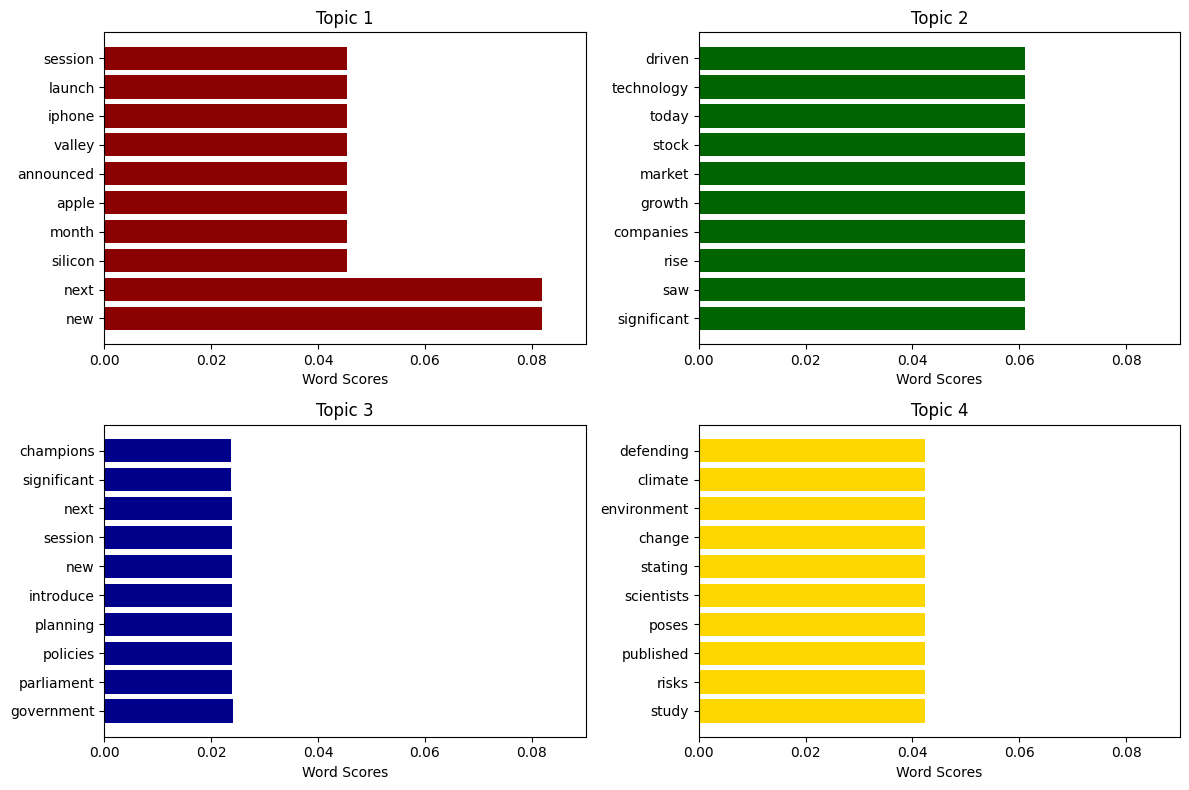

In [ ]:
#Visualization-2: Topic Word Scores
import matplotlib.pyplot as plt
import numpy as np

topics = lda_model.show_topics(formatted=False)
topic_words = {i: [word[0] for word in topic[1]] for i, topic in enumerate(topics)}

topic_scores = {}
for i in range(len(topics)):
    topic_scores[i] = [lda_model.get_topic_terms(i, topn=10)[j][1] for j in range(len(topic_words[i]))]

max_score = max([max(topic_scores[i]) for i in range(len(topics))])
x_limits = (0, max_score * 1.1)

y_ticks = np.arange(len(topic_words[0]))

plt.figure(figsize=(12, 8))
colors = ['#8B0000', '#006400', '#00008B', '#FFD700']
for i, words in topic_words.items():
    plt.subplot(2, 2, i + 1)
    plt.barh(y_ticks, topic_scores[i], color=colors[i])
    plt.yticks(y_ticks, words)
    plt.title(f'Topic {i + 1}')
    plt.xlabel('Word Scores')
    plt.xlim(x_limits)

plt.tight_layout()
plt.show()

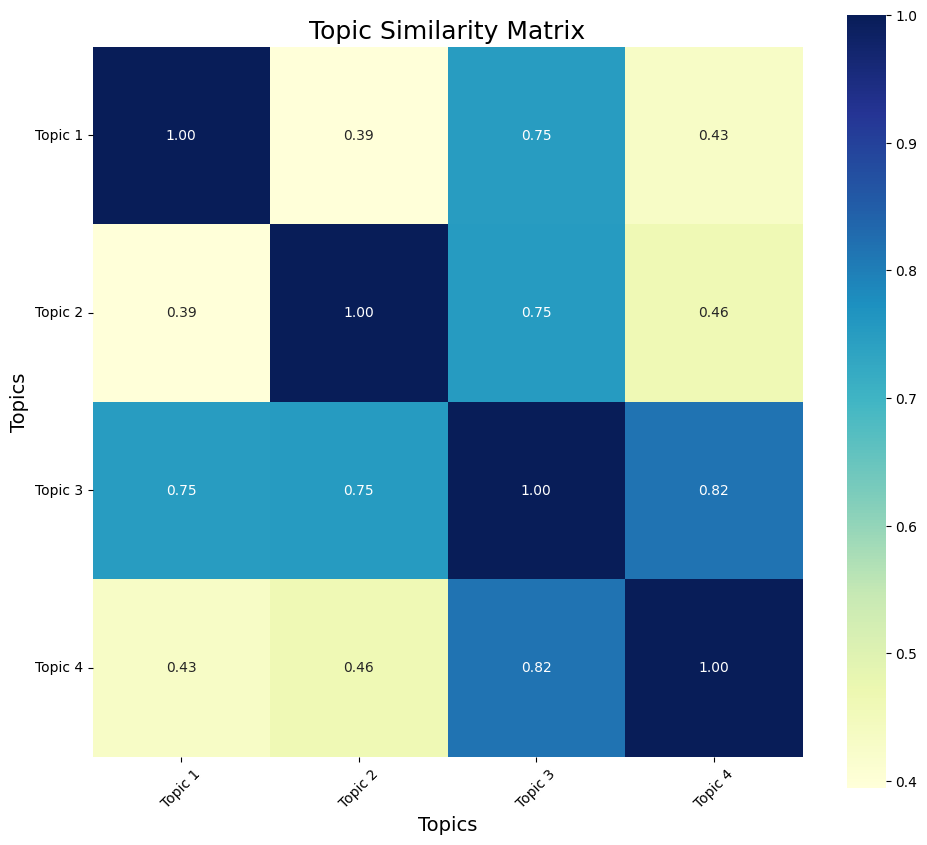

In [ ]:
#Visualization-3: Topic Similarity Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

topic_terms = lda_model.get_topics()

similarity_matrix = cosine_similarity(topic_terms)

plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="YlGnBu", square=True,
            xticklabels=[f'Topic {i + 1}' for i in range(num_topics)],
            yticklabels=[f'Topic {i + 1}' for i in range(num_topics)],
            cbar_kws={"shrink": .8})
plt.title('Topic Similarity Matrix', fontsize=18)
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Topics', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Visualization-1: Intertopic Distance Map** -
The intertopic distance map is a tool for visualizing the relationships between different topicsby the LDA model which helps in understanding how topics are distributed across the corpus.
Each circle on a map represents a topic and the position indicates the distance between the topics, the size of the circle reflects the frequency of the topic within the corpus
As we can see we have four topics and topic 1 is the largest.

**Visualization-2: Topic Word Scores** -
This visualization provides a clear representation of the most significant words associated with each topic and their corresponding importance and it also helps in understanding the makeup of each topic.Each subplot corresponds to a different topic, with the horizontal bars indicating the importance of the top words associated with that topic. The y-axis contains the top words for each topic, while the x-axis represents the word scores, which indicate the strength of association between the word and the topic.
The use of distinct colors for each topic enhances visual differentiation and makes it easier to compare the word scores across topics.By examining the word scores, we can quickly identify which words are most representative of each topic and assess the coherence and relevance of the topics based on these key terms. This can help in evaluating the quality of the LDA model.

**Visualization-3: Topic Similarity Matrix** - The topic similarity matrix visualizes the degree of similarity between topics, allowing users to assess how closely related or distinct the identified topics are. The matrix is a square grid where each cell represents the similarity score between two topics. The scores are calculated using cosine similarity based on the topic-term distributions. A value of 1.0 indicates perfect similarity, while values closer to 0 suggest less similarity. The heatmap utilizes color gradients to represent similarity levels, with darker colors typically indicating higher similarity. We can identify which topics are closely related or might be overlapping based on the similarity scores. This can guide decisions about whether to merge topics, further refine the model, or understand thematic relationships within the data.


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [11]:
# Write your code here
"""When comparing the performance of the three topic modeling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), and BERTopic—LSA emerges as the most
effective method for extracting meaningful topics from the dataset. The LDA model produced four topics with a coherence score of 0.3918. While this indicates some level of topic
coherence, the topics generated were somewhat overlapping and less distinct. For instance, the topics included themes related to government policies, market trends, and climate
change, but they did not clearly differentiate the nuances within these themes. The keywords for LDA topics also included frequent words such as "new," "significant," and "government,"
which may indicate less specificity in capturing the essence of the underlying documents. In contrast, the LSA model demonstrated superior performance with a coherence score of
0.8551 when tested with four topics. This higher score suggests that the topics identified are more meaningful and relevant to the documents analyzed. The LSA topics included clear
and distinct themes such as governmental actions, market dynamics, football events, and environmental studies. Each topic featured keywords that accurately reflected the content of
the documents, providing a more comprehensive understanding of the text. On the other hand, the BERTopic model did not yield any coherent topics or summaries, resulting in a failure
to generate useful insights from the dataset. This limitation may stem from issues related to the model's configuration or the characteristics of the input data, which hindered its
ability to extract meaningful topics effectively. In summary, LSA stands out as the best-performing algorithm among the three, providing well-defined and interpretable topics that
enhance the understanding of the underlying themes in the text. LDA, while useful, delivered less clarity and cohesion, and BERTopic's inability to generate any summary rendered it
ineffective for this analysis."""

'When comparing the performance of the three topic modeling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), and BERTopic—LSA emerges as the most \neffective method for extracting meaningful topics from the dataset. The LDA model produced four topics with a coherence score of 0.3918. While this indicates some level of topic\ncoherence, the topics generated were somewhat overlapping and less distinct. For instance, the topics included themes related to government policies, market trends, and climate\nchange, but they did not clearly differentiate the nuances within these themes. The keywords for LDA topics also included frequent words such as "new," "significant," and "government,"\nwhich may indicate less specificity in capturing the essence of the underlying documents. In contrast, the LSA model demonstrated superior performance with a coherence score of\n0.8551 when tested with four topics. This higher score suggests that the topics identified are more me

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [12]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Throughout this assignment, I gained valuable insights into working with text data and learned how to use different topic modeling methods. I found that applying these algorithms
helped me better understand how to extract meaningful information from text. However, I faced some challenges along the way, particularly with interpreting the results and ensuring
that the models generated coherent topics. This exercise is particularly relevant to my studies in natural language processing (NLP), as it emphasizes the importance of feature
extraction in analyzing and understanding language data.

'''

'\nPlease write you answer here:\nThroughout this assignment, I gained valuable insights into working with text data and learned how to use different topic modeling methods. I found that applying these algorithms \nhelped me better understand how to extract meaningful information from text. However, I faced some challenges along the way, particularly with interpreting the results and ensuring \nthat the models generated coherent topics. This exercise is particularly relevant to my studies in natural language processing (NLP), as it emphasizes the importance of feature\nextraction in analyzing and understanding language data.\n\n'